## Problem Statement

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statistics

In [2]:
#reading the aerofit data
aerofit_treadmill = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749')
aerofit_treadmill

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [3]:
#getting the columns and rows of the data
aerofit_treadmill.shape

(180, 9)

In [4]:
#Getting the info about the data
aerofit_treadmill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
# features of all the numerical data
aerofit_treadmill.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [6]:
# checking for the count of null values
aerofit_treadmill.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [7]:
# data types of all the attributes
aerofit_treadmill.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [8]:
# getting number of unique products
aerofit_treadmill['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [9]:
# counting number of male & female
aerofit_treadmill['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [10]:
# checking the marital status count in the data
aerofit_treadmill['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [11]:
# getting number of unique fitness level
aerofit_treadmill['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [12]:
# creating income bins & labels
income_lables_intervals = aerofit_treadmill['Income'].value_counts(bins = 16, sort = False).index
income_lables = []
income_bins = [income_lables_intervals[0].left]
for i in income_lables_intervals:
    interval = str(i.left+1) + ' - ' + str(i.right)
    income_lables.append(interval)
    income_bins.append(i.right)
income_bins

[29486.98,
 34250.688,
 38939.375,
 43628.062,
 48316.75,
 53005.438,
 57694.125,
 62382.812,
 67071.5,
 71760.188,
 76448.875,
 81137.562,
 85826.25,
 90514.938,
 95203.625,
 99892.312,
 104581.0]

In [13]:
# adding income category based on income range
aerofit_treadmill['Income Category'] = pd.cut(aerofit_treadmill['Income'],bins=income_bins,labels=income_lables)
aerofit_treadmill

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income Category
0,KP281,18,Male,14,Single,3,4,29562,112,29487.98 - 34250.688
1,KP281,19,Male,15,Single,2,3,31836,75,29487.98 - 34250.688
2,KP281,19,Female,14,Partnered,4,3,30699,66,29487.98 - 34250.688
3,KP281,19,Male,12,Single,3,3,32973,85,29487.98 - 34250.688
4,KP281,20,Male,13,Partnered,4,2,35247,47,34251.688 - 38939.375
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,81138.562 - 85826.25
176,KP781,42,Male,18,Single,5,4,89641,200,85827.25 - 90514.938
177,KP781,45,Male,16,Single,5,5,90886,160,90515.938 - 95203.625
178,KP781,47,Male,18,Partnered,4,5,104581,120,99893.312 - 104581.0


In [14]:
# creating age bins & labels
bins_age = [17, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51]
lables_age = ['18 - 21', '22 - 24', '25 - 27', '28 - 30', '31 - 33', '34 - 36', '37 - 39', '40 - 42','43 - 45','46 - 48', '49 - 51']

In [15]:
# adding age category based on age range
aerofit_treadmill['Age Category'] = pd.cut(aerofit_treadmill['Age'],bins=bins_age,labels=lables_age)
aerofit_treadmill

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income Category,Age Category
0,KP281,18,Male,14,Single,3,4,29562,112,29487.98 - 34250.688,18 - 21
1,KP281,19,Male,15,Single,2,3,31836,75,29487.98 - 34250.688,18 - 21
2,KP281,19,Female,14,Partnered,4,3,30699,66,29487.98 - 34250.688,18 - 21
3,KP281,19,Male,12,Single,3,3,32973,85,29487.98 - 34250.688,18 - 21
4,KP281,20,Male,13,Partnered,4,2,35247,47,34251.688 - 38939.375,18 - 21
...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,81138.562 - 85826.25,40 - 42
176,KP781,42,Male,18,Single,5,4,89641,200,85827.25 - 90514.938,40 - 42
177,KP781,45,Male,16,Single,5,5,90886,160,90515.938 - 95203.625,43 - 45
178,KP781,47,Male,18,Partnered,4,5,104581,120,99893.312 - 104581.0,46 - 48


## Visual Analysis for all the data

<AxesSubplot:xlabel='Gender', ylabel='count'>

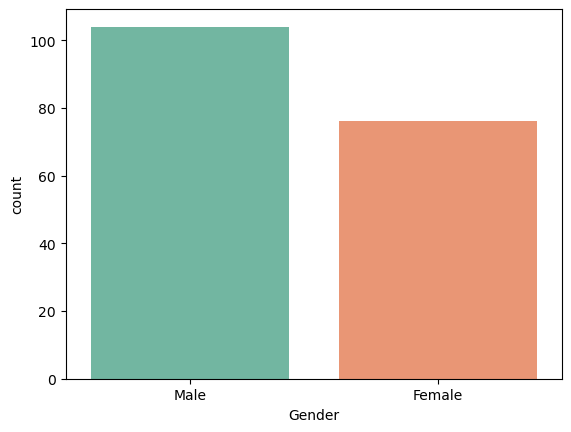

In [16]:
# There are more than 20% male customers than females
sns.countplot( data = aerofit_treadmill,
               x = 'Gender',
               palette = 'Set2')

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

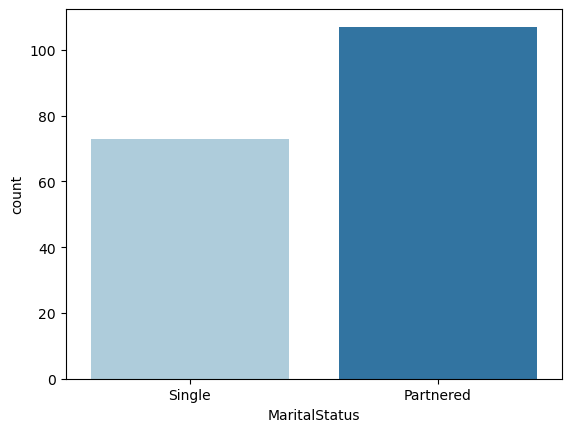

In [17]:
# Married guys bought more products
sns.countplot( data = aerofit_treadmill,
               x = 'MaritalStatus',
               palette = 'Paired')

<AxesSubplot:xlabel='Fitness', ylabel='count'>

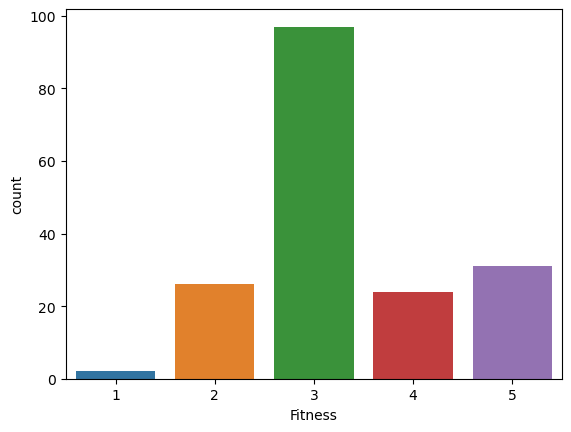

In [18]:
# customers with fitness level 3 bought more products
sns.countplot( data = aerofit_treadmill,
               x = 'Fitness'  )

<AxesSubplot:xlabel='Education', ylabel='count'>

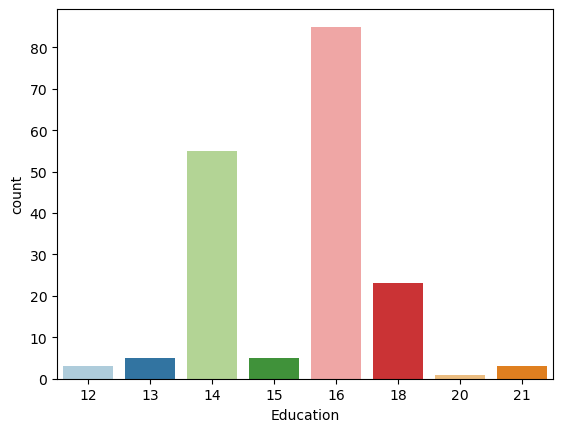

In [19]:
# customers with education 14,16 bought more products
sns.countplot( data = aerofit_treadmill,
               x = 'Education',
               palette = 'Paired')

(array([17., 62., 28., 23., 22., 11.,  7.,  5.,  5.]),
 array([18.        , 21.55555556, 25.11111111, 28.66666667, 32.22222222,
        35.77777778, 39.33333333, 42.88888889, 46.44444444, 50.        ]),
 <BarContainer object of 9 artists>)

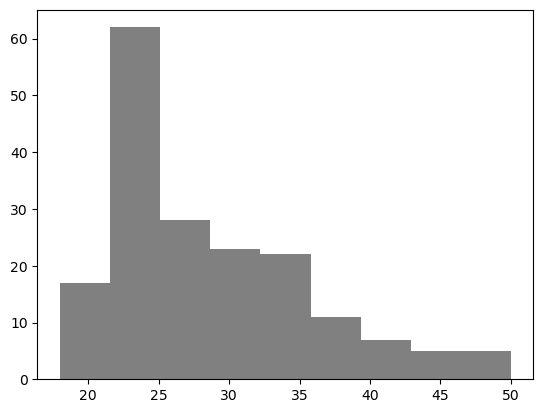

In [20]:
# we can see a poison distribution here, and age group between 22-25 bought more products
plt.hist( data = aerofit_treadmill,
          x = 'Age',
          bins = 9,
          color = 'grey') 

(array([14., 16., 19., 32., 36., 21.,  9.,  9.,  2.,  3.,  2.,  3.,  8.,
         2.,  4.]),
 array([ 29562.        ,  34563.26666667,  39564.53333333,  44565.8       ,
         49567.06666667,  54568.33333333,  59569.6       ,  64570.86666667,
         69572.13333333,  74573.4       ,  79574.66666667,  84575.93333333,
         89577.2       ,  94578.46666667,  99579.73333333, 104581.        ]),
 <BarContainer object of 15 artists>)

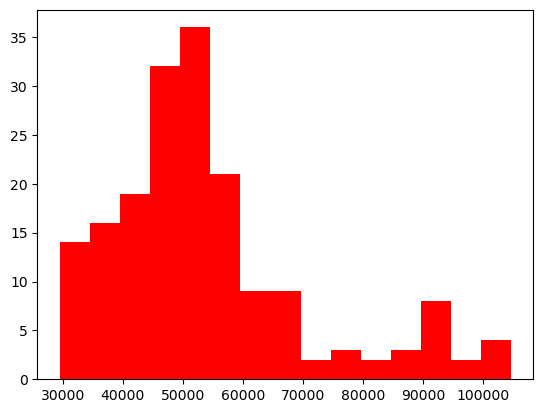

In [21]:
# income group between 45000-55000 bought more products
plt.hist( data = aerofit_treadmill,
          x = 'Income',
          bins = 15,
          color = 'red'
        )

(array([ 8., 38., 41., 39., 19.,  7.,  9., 13.,  1.,  1.,  1.,  1.,  1.,
         0.,  1.]),
 array([ 21. ,  43.6,  66.2,  88.8, 111.4, 134. , 156.6, 179.2, 201.8,
        224.4, 247. , 269.6, 292.2, 314.8, 337.4, 360. ]),
 <BarContainer object of 15 artists>)

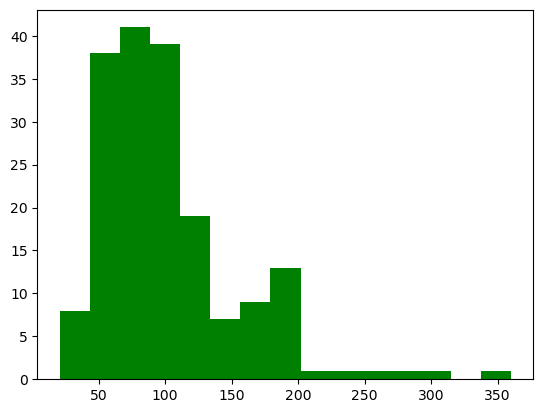

In [22]:
# Miles group between 50-110 bought more products, and it seems as poison distribution
plt.hist( data = aerofit_treadmill,
          x = 'Miles',
          bins = 15,
          color = 'Green'
        ) 

<AxesSubplot:xlabel='Product', ylabel='count'>

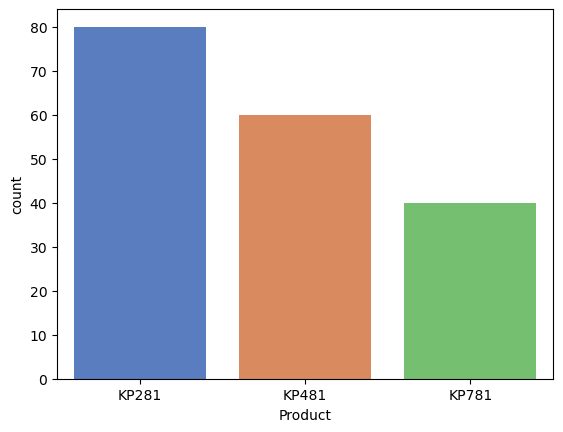

In [23]:
# KP281 is the best selling product
sns.countplot( data = aerofit_treadmill,
               x = 'Product',
               palette = 'muted')

<AxesSubplot:>

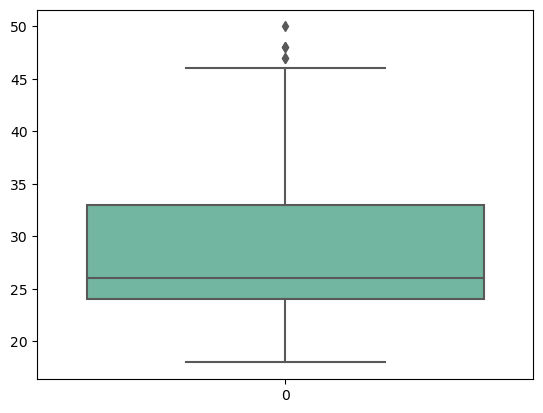

In [24]:
# 50% of the buyers age lies between 25 to 33
sns.boxplot(data = aerofit_treadmill['Age'], palette = 'Set2')

<AxesSubplot:xlabel='Product', ylabel='Income'>

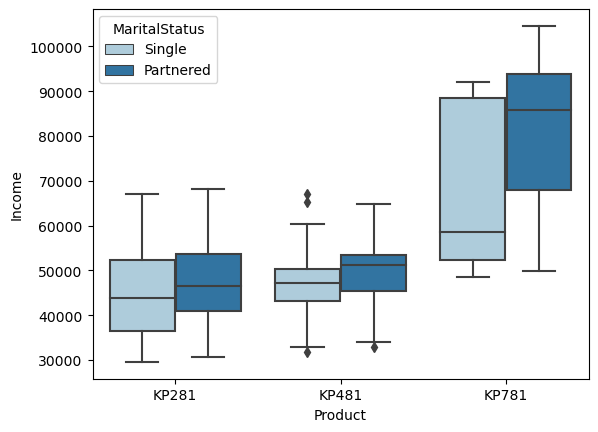

In [25]:
# Product wise income data range for buyers
sns.boxplot(data = aerofit_treadmill, hue = 'MaritalStatus', x = 'Product', y = 'Income', palette = 'Paired')

<AxesSubplot:xlabel='Gender', ylabel='Income'>

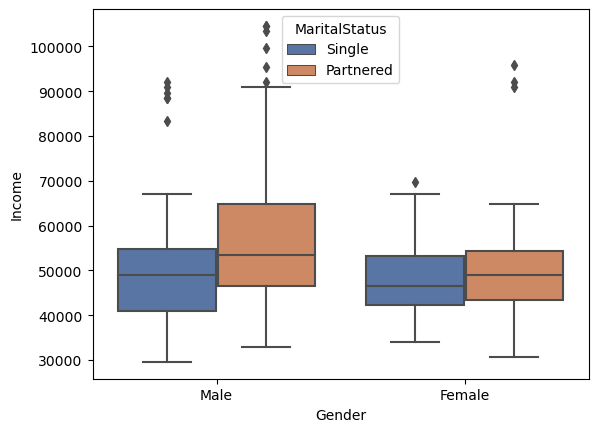

In [26]:
# ouliers and gender wise income data range for buyers
sns.boxplot(data = aerofit_treadmill, hue = 'MaritalStatus', x = 'Gender', y = 'Income', palette = 'deep')

<AxesSubplot:xlabel='Gender', ylabel='Miles'>

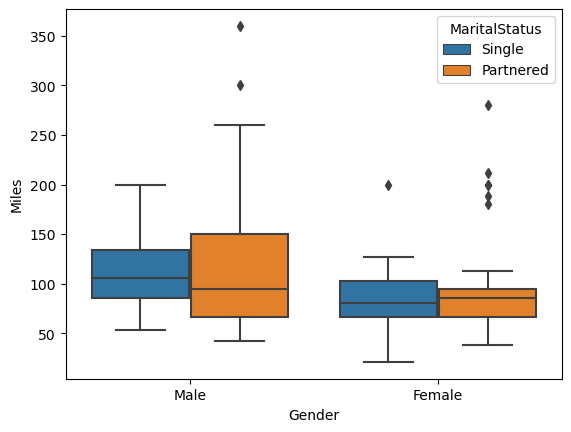

In [27]:
# ouliers and gender wise miles data range for buyers
sns.boxplot(data = aerofit_treadmill, hue = 'MaritalStatus', x = 'Gender', y = 'Miles')

<AxesSubplot:xlabel='Product', ylabel='Miles'>

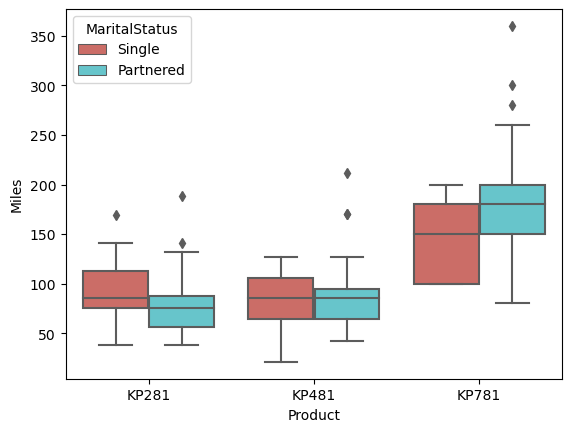

In [28]:
# ouliers and Marital wise miles data range for buyers
sns.boxplot(data = aerofit_treadmill, hue = 'MaritalStatus', x = 'Product', y = 'Miles', palette = 'hls')

<AxesSubplot:>

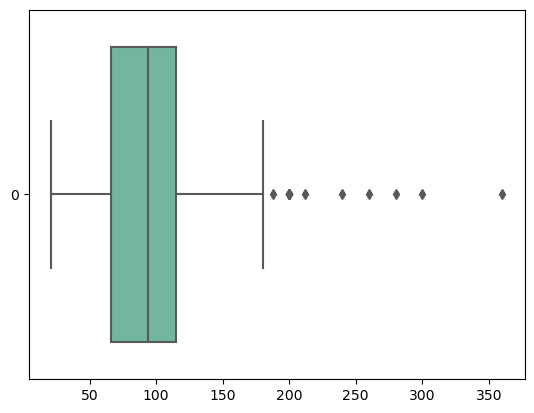

In [29]:
# Miles data of buyers with outliers
sns.boxplot(data = aerofit_treadmill['Miles'], orient="h", palette = 'Set2')

In [30]:
# co-relation between every attribute present
aerofit_treadmill.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


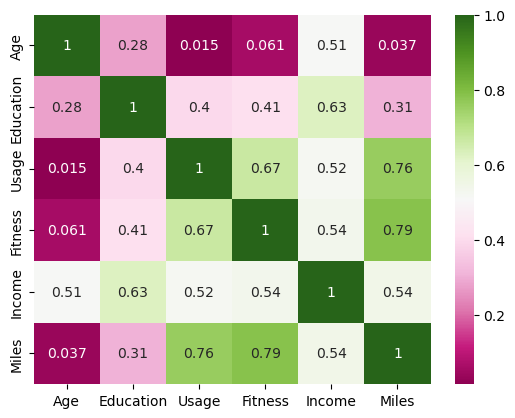

In [31]:
# fitness, miles, usage, income are more positively related
sns.heatmap(aerofit_treadmill.corr(), cmap= "PiYG", annot=True)
plt.show()

<AxesSubplot:xlabel='Fitness', ylabel='Miles'>

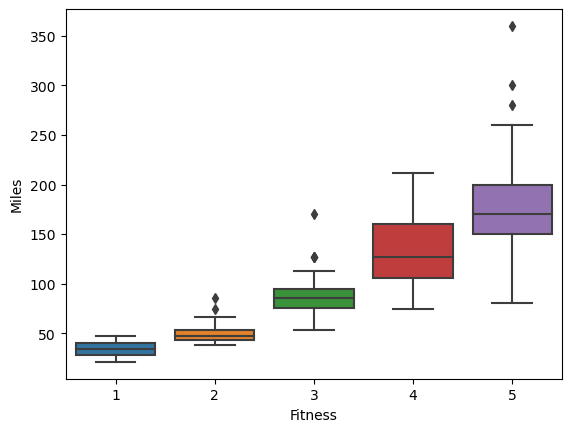

In [32]:
sns.boxplot(data = aerofit_treadmill,  x = 'Fitness', y = 'Miles')

<AxesSubplot:xlabel='Gender', ylabel='Income'>

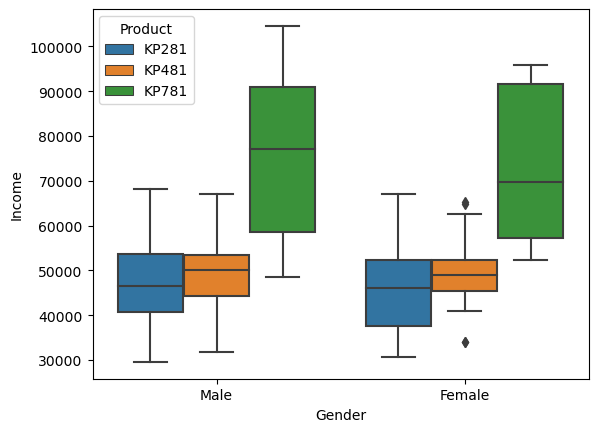

In [33]:
sns.boxplot(data = aerofit_treadmill,  hue = 'Product', x = 'Gender', y = 'Income')

<AxesSubplot:xlabel='count', ylabel='Age Category'>

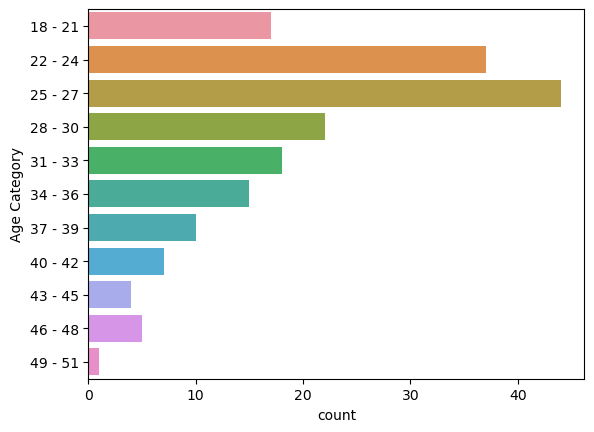

In [34]:
# there are more buyers within age 22-30
sns.countplot(data = aerofit_treadmill,
              y = 'Age Category')

<AxesSubplot:xlabel='Age Category'>

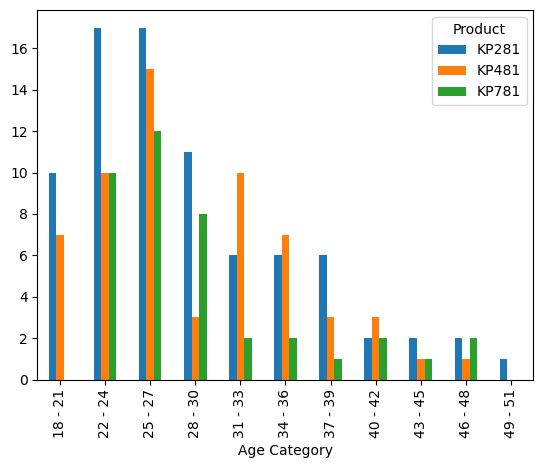

In [35]:
# age group wise products selled info
age_product_data = pd.crosstab(index = aerofit_treadmill['Age Category'], columns = aerofit_treadmill['Product'], normalize = False, margins = False)
age_product_data.plot(kind="bar",stacked=False)

### Probabilities

In [36]:
pd.crosstab(index = aerofit_treadmill['Gender'],
            columns = aerofit_treadmill['Product'],
            margins = True,
            normalize = True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.222222,0.161111,0.038889,0.422222
Male,0.222222,0.172222,0.183333,0.577778
All,0.444444,0.333333,0.222222,1.000000


In [37]:
pd.crosstab(index = aerofit_treadmill['Product'],
            columns = aerofit_treadmill['Product'],
            normalize = True)

Product,KP281,KP481,KP781
Product,,,
KP281,0.444444,0.000000,0.000000
KP481,0.000000,0.333333,0.000000
KP781,0.000000,0.000000,0.222222


In [38]:
pd.crosstab(index = aerofit_treadmill['Product'],
            columns = aerofit_treadmill['Age Category'],
            normalize = True, 
            margins = False)

Age Category,18 - 21,22 - 24,25 - 27,28 - 30,31 - 33,34 - 36,37 - 39,40 - 42,43 - 45,46 - 48,49 - 51
Product,,,,,,,,,,,
KP281,0.055556,0.094444,0.094444,0.061111,0.033333,0.033333,0.033333,0.011111,0.011111,0.011111,0.005556
KP481,0.038889,0.055556,0.083333,0.016667,0.055556,0.038889,0.016667,0.016667,0.005556,0.005556,0.000000
KP781,0.000000,0.055556,0.066667,0.044444,0.011111,0.011111,0.005556,0.011111,0.005556,0.011111,0.000000


## Analysis for KP281 Product

#### Visualtion

In [39]:
#Masking out data for product KP281
KP281ProductData = aerofit_treadmill[aerofit_treadmill['Product'] == 'KP281']
KP281ProductData.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income Category,Age Category
0,KP281,18,Male,14,Single,3,4,29562,112,29487.98 - 34250.688,18 - 21
1,KP281,19,Male,15,Single,2,3,31836,75,29487.98 - 34250.688,18 - 21
2,KP281,19,Female,14,Partnered,4,3,30699,66,29487.98 - 34250.688,18 - 21
3,KP281,19,Male,12,Single,3,3,32973,85,29487.98 - 34250.688,18 - 21
4,KP281,20,Male,13,Partnered,4,2,35247,47,34251.688 - 38939.375,18 - 21


Text(0, 0.5, 'Gender')

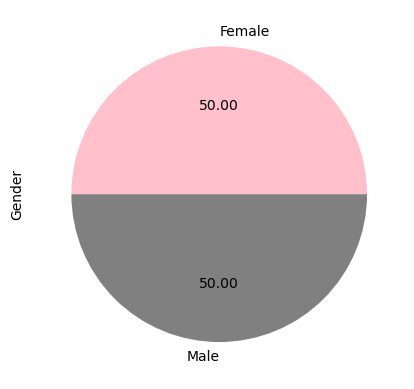

In [40]:
# male & female bought this product in the same portion
KP281ProductData.groupby('Gender').size().plot(kind='pie', autopct='%.2f', colors = ['Pink', 'grey'])
plt.ylabel('Gender')

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

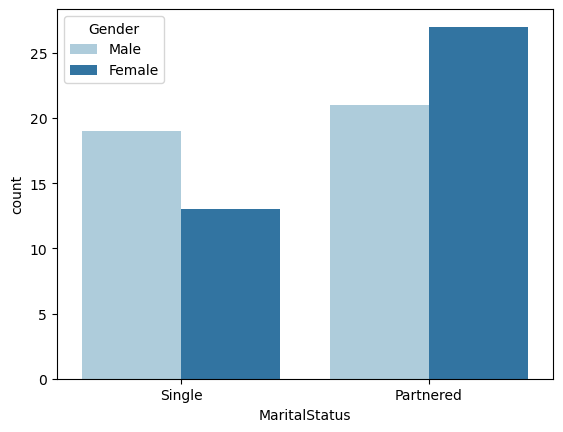

In [41]:
# Male single's & Female Partnered bought more
sns.countplot(data = KP281ProductData,
              x = 'MaritalStatus',
              hue = 'Gender',
              palette = 'Paired')

<AxesSubplot:xlabel='Income'>

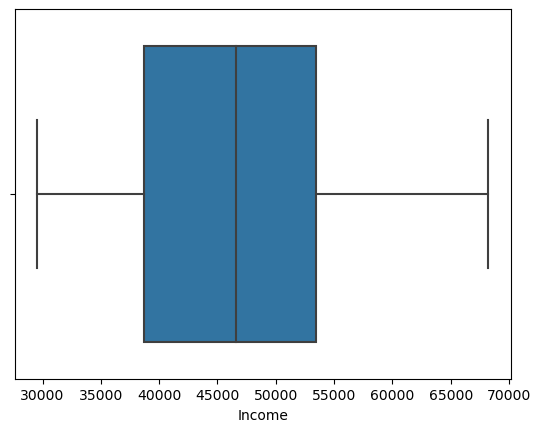

In [42]:
# There are no outliers in the income data who bought this product
sns.boxplot(data = KP281ProductData,
            x = 'Income')

<AxesSubplot:xlabel='count', ylabel='Age Category'>

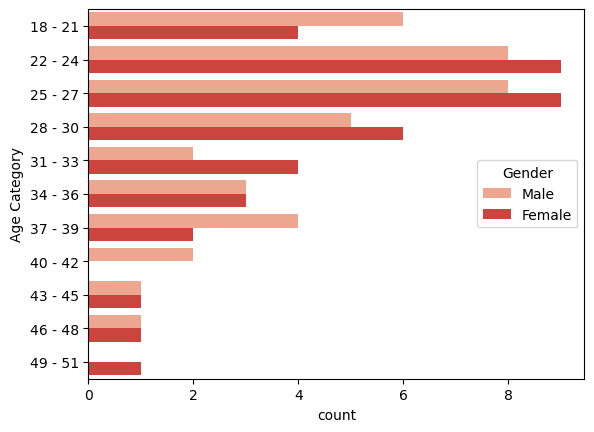

In [43]:
# 22 - 27 ranged age people bought the products more
sns.countplot(y = KP281ProductData['Age Category'], hue = KP281ProductData['Gender'], palette = 'Reds')

<AxesSubplot:xlabel='Education', ylabel='count'>

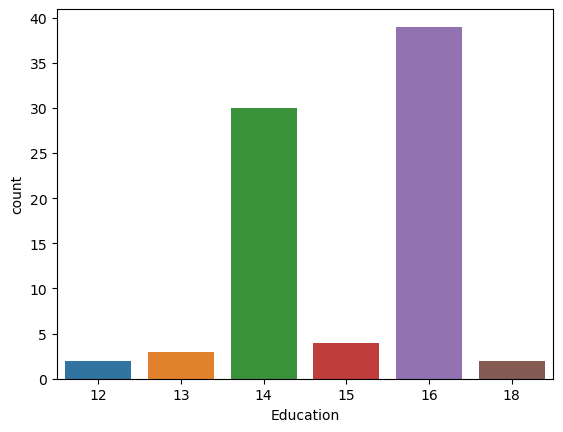

In [44]:
# customers with education 14,16 bought more products
sns.countplot(x = KP281ProductData['Education'])

<AxesSubplot:xlabel='count', ylabel='Income Category'>

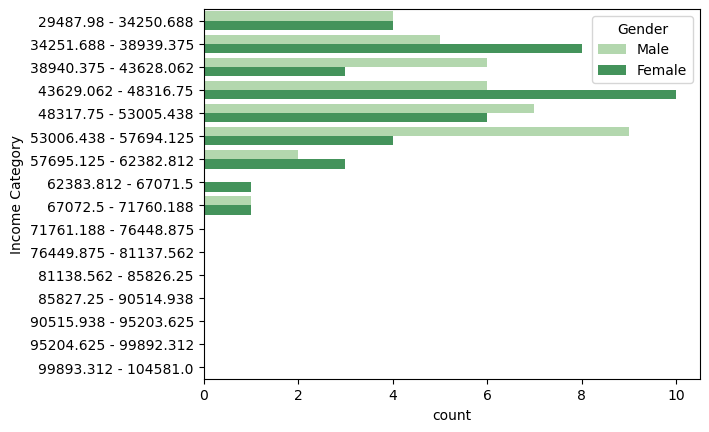

In [45]:
# 34251 - 57694 ranged income people bought the products more
sns.countplot(y = KP281ProductData['Income Category'], hue = KP281ProductData['Gender'], palette = 'Greens')

<AxesSubplot:xlabel='Fitness', ylabel='count'>

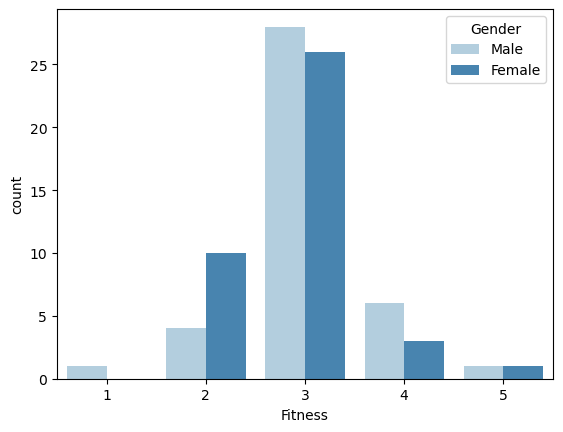

In [46]:
# people with fitness level 3 bought the product more
sns.countplot(x = KP281ProductData['Fitness'], hue = KP281ProductData['Gender'], palette = 'Blues')

<AxesSubplot:xlabel='Product', ylabel='Miles'>

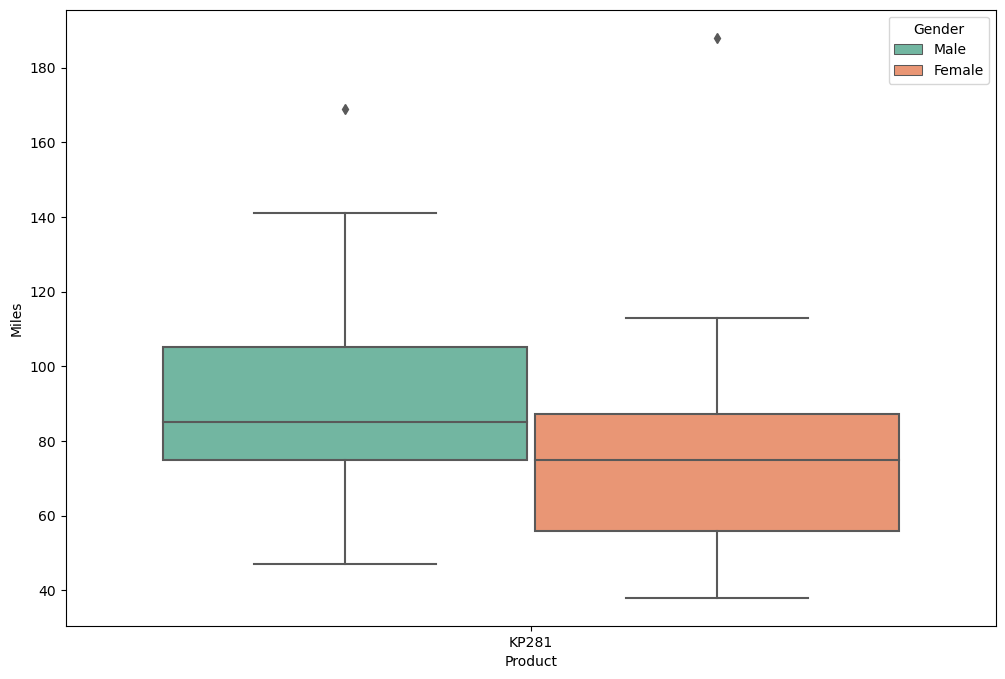

In [47]:
# range for the product based on Miles
plt.figure(figsize=(12,8))
sns.boxplot(data=KP281ProductData,
           y="Miles",
           x="Product",
           hue = 'Gender',
           palette = 'Set2')

<AxesSubplot:xlabel='Fitness', ylabel='Income'>

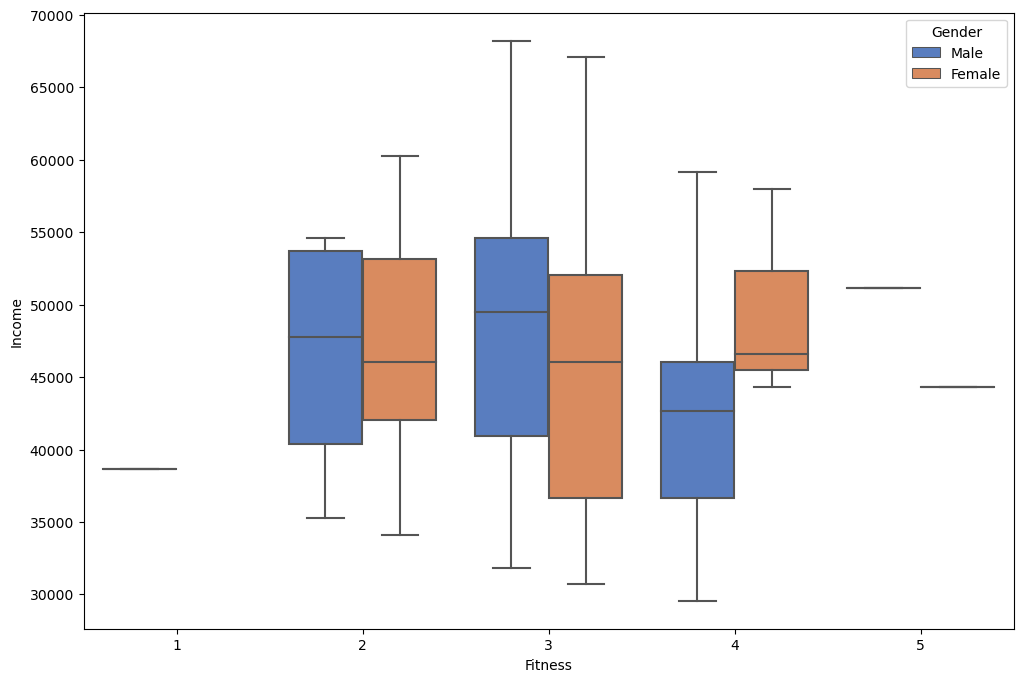

In [48]:
# range for the product based on Income, gender wise
plt.figure(figsize=(12,8))
sns.boxplot(data=KP281ProductData,
           y="Income",
           x="Fitness",
           hue = 'Gender',
           palette = 'muted')

<AxesSubplot:>

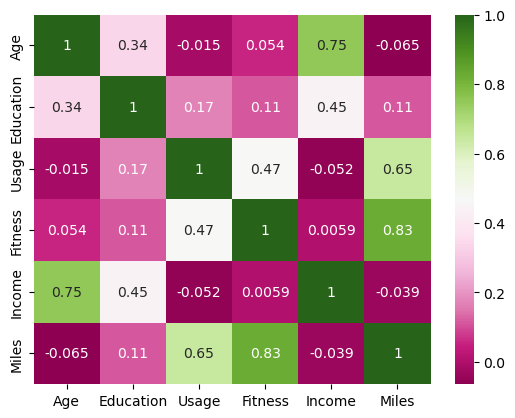

In [49]:
# fitness, miles, usage, income are more positively related
sns.heatmap(KP281ProductData.corr(), cmap = 'PiYG', annot=True)

#### Probability & Stats

In [50]:
# Gender wise probability
KP281GenderProbability = pd.crosstab(index = KP281ProductData['Product'], columns = KP281ProductData['Gender'], normalize= True)
KP281GenderProbability

Gender,Female,Male
Product,,
KP281,0.5,0.5


In [51]:
# age group wise probability
KP281AgeProbability = pd.crosstab(index = KP281ProductData['Gender'], columns = KP281ProductData['Age Category'], normalize= True)
KP281AgeProbability

Age Category,18 - 21,22 - 24,25 - 27,28 - 30,31 - 33,34 - 36,37 - 39,40 - 42,43 - 45,46 - 48,49 - 51
Gender,,,,,,,,,,,
Female,0.050,0.1125,0.1125,0.0750,0.050,0.0375,0.025,0.000,0.0125,0.0125,0.0125
Male,0.075,0.1000,0.1000,0.0625,0.025,0.0375,0.050,0.025,0.0125,0.0125,0.0000


In [52]:
# income range wise probability
KP281IncomeProbability = pd.crosstab(index = KP281ProductData['Gender'], columns = KP281ProductData['Income Category'], normalize= True)
KP281IncomeProbability

Income Category,29487.98 - 34250.688,34251.688 - 38939.375,38940.375 - 43628.062,43629.062 - 48316.75,48317.75 - 53005.438,53006.438 - 57694.125,57695.125 - 62382.812,62383.812 - 67071.5,67072.5 - 71760.188
Gender,,,,,,,,,
Female,0.05,0.1000,0.0375,0.125,0.0750,0.0500,0.0375,0.0125,0.0125
Male,0.05,0.0625,0.0750,0.075,0.0875,0.1125,0.0250,0.0000,0.0125


In [53]:
# usage wise probability
KP281MilesProbability = pd.crosstab(index = KP281ProductData['Gender'], columns = KP281ProductData['Usage'], normalize= True)
KP281MilesProbability

Usage,2,3,4,5
Gender,,,,
Female,0.1625,0.2375,0.0875,0.0125
Male,0.0750,0.2250,0.1875,0.0125


In [54]:
# fitness wise probability 
KP281FitnessProbability = pd.crosstab(index = KP281ProductData['Gender'], columns = KP281ProductData['Fitness'], normalize= True)
KP281FitnessProbability

Fitness,1,2,3,4,5
Gender,,,,,
Female,0.0000,0.125,0.325,0.0375,0.0125
Male,0.0125,0.050,0.350,0.0750,0.0125


In [55]:
# income ranging 34000 to 57000 has probability of 0.825
KP281IncomeProb = (KP281ProductData[(KP281ProductData['Income']>= 34000) & (KP281ProductData['Income']<= 57000)].shape[0])/KP281ProductData.shape[0]
KP281IncomeProb

0.825

In [56]:
# age ranging 20 to 33 has probability of 0.7125
KP281AgeProb = (KP281ProductData[(KP281ProductData['Age']>= 20) & (KP281ProductData['Age']<= 33)].shape[0])/KP281ProductData.shape[0]
KP281AgeProb

0.7125

In [57]:
# fitness ranging 2 to 4 has probability of 0.96
KP281FitnessProb = (KP281ProductData[(KP281ProductData['Fitness']>= 2) & (KP281ProductData['Fitness']<= 4)].shape[0])/KP281ProductData.shape[0]
KP281FitnessProb

0.9625

In [58]:
IncomeAgeProb = (KP281ProductData[(KP281ProductData['Income']>= 34000) & (KP281ProductData['Income']<= 57000) & (KP281ProductData['Age']>= 20) & (KP281ProductData['Age']<= 33)].shape[0])/KP281ProductData.shape[0]
IncomeAgeProb

0.675

In [59]:
IncomeAgeFitnessProb = (KP281ProductData[(KP281ProductData['Income']>= 34000) & (KP281ProductData['Income']<= 57000) & (KP281ProductData['Age']>= 20) & (KP281ProductData['Age']<= 33) & (KP281ProductData['Fitness']>= 2) & (KP281ProductData['Fitness']<= 4)].shape[0])/KP281ProductData.shape[0]
IncomeAgeFitnessProb

0.65

In [60]:
IncomeAgeFitnessMilesProb = (KP281ProductData[(KP281ProductData['Income']>= 34000) & (KP281ProductData['Income']<= 57000) & (KP281ProductData['Age']>= 20) & (KP281ProductData['Age']<= 33) & (KP281ProductData['Fitness']>= 2) & (KP281ProductData['Fitness']<= 4) & (KP281ProductData['Miles']>= 60) & (KP281ProductData['Miles']<= 98)].shape[0])/KP281ProductData.shape[0]
IncomeAgeFitnessMilesProb

0.3125

In [61]:
# The Median of males who bought the product, mean and limits of data based on attributes
mdata = KP281ProductData[KP281ProductData['Gender'] == 'Male']
fitness_focus = [1,2,3,4,5]
for i in fitness_focus:
    print('<---------- For fitness level', i ,'---------->')
    data = mdata[mdata['Fitness'] == i]
    if (data.shape[0] != 0):
        q1 = data[['Income', 'Miles', 'Usage', 'Education', 'Age']].quantile(0.25)
        q2 = data[['Income', 'Miles', 'Usage', 'Education', 'Age']].quantile(0.50)
        q3 = data[['Income', 'Miles', 'Usage', 'Education', 'Age']].quantile(0.75)
        print('Median Income:',q2[0],', Median Miles:',q2[1],', Medain Usage:', q2[2],', Medain Education:', q2[3],', Medain Age:', q2[4])

        iqr = q3 - q1

        lowerLimit = q1 - (1.5)*iqr
        upperLimit = q3 + (1.5)*iqr
        print('lowerLimit Income:', lowerLimit[0],', upperLimit Income:',upperLimit[0])
        print('lowerLimit Miles:', lowerLimit[1],', upperLimit Miles:',upperLimit[1])
        print('lowerLimit Usage:', lowerLimit[2],', upperLimit Usage:',upperLimit[2])
        print('lowerLimit Education:', lowerLimit[3],', upperLimit Education:',upperLimit[3])
        print('lowerLimit Age:', lowerLimit[4],', upperLimit Age:',upperLimit[4])
        mean_income = mdata[(mdata['Income'] >= lowerLimit[0]) & (mdata['Income'] <= upperLimit[0])]['Income'].mean()
        print('Mean income: ', mean_income)
        mean_miles = mdata[(mdata['Miles'] >= lowerLimit[1]) & (mdata['Miles'] <= upperLimit[1])]['Miles'].mean()
        print('Mean miles: ', mean_miles)
        mean_usage = mdata[(mdata['Usage'] >= lowerLimit[2]) & (mdata['Usage'] <= upperLimit[2])]['Usage'].mean()
        print('Mean usage: ', mean_usage)
        mean_education = mdata[(mdata['Education'] >= lowerLimit[3]) & (mdata['Education'] <= upperLimit[3])]['Education'].mean()
        print('Mean Education: ', mean_education)
        mean_age = mdata[(mdata['Age'] >= lowerLimit[4]) & (mdata['Age'] <= upperLimit[4])]['Age'].mean()
        print('Mean Age: ', mean_age)
        print()
    else:
        print('No data with this fitness level.')
        print()

<---------- For fitness level 1 ---------->
Median Income: 38658.0 , Median Miles: 47.0 , Medain Usage: 3.0 , Medain Education: 16.0 , Medain Age: 23.0
lowerLimit Income: 38658.0 , upperLimit Income: 38658.0
lowerLimit Miles: 47.0 , upperLimit Miles: 47.0
lowerLimit Usage: 3.0 , upperLimit Usage: 3.0
lowerLimit Education: 16.0 , upperLimit Education: 16.0
lowerLimit Age: 23.0 , upperLimit Age: 23.0
Mean income:  38658.0
Mean miles:  47.0
Mean usage:  3.0
Mean Education:  16.0
Mean Age:  23.0

<---------- For fitness level 2 ---------->
Median Income: 47754.0 , Median Miles: 47.0 , Medain Usage: 2.5 , Medain Education: 13.5 , Medain Age: 25.0
lowerLimit Income: 20323.875 , upperLimit Income: 73762.875
lowerLimit Miles: 47.0 , upperLimit Miles: 47.0
lowerLimit Usage: 0.125 , upperLimit Usage: 5.125
lowerLimit Education: 10.75 , upperLimit Education: 16.75
lowerLimit Age: 16.625 , upperLimit Age: 33.625
Mean income:  46815.975
Mean miles:  47.0
Mean usage:  3.275
Mean Education:  14.89743

In [62]:
# The Median of females who bought the product, mean and limits of data based on attributes
fdata = KP281ProductData[KP281ProductData['Gender'] == 'Female']
fitness_focus = [1,2,3,4,5]
for i in fitness_focus:
    print('<---------- For fitness level', i ,'---------->')
    data = fdata[fdata['Fitness'] == i]
    if (data.shape[0] != 0):
        
        q1 = data[['Income', 'Miles', 'Usage', 'Education', 'Age']].quantile(0.25)
        q2 = data[['Income', 'Miles', 'Usage', 'Education', 'Age']].quantile(0.50)
        q3 = data[['Income', 'Miles', 'Usage', 'Education', 'Age']].quantile(0.75)
        print('Median Income:',q2[0],', Median Miles:',q2[1],', Medain Usage:', q2[2],', Medain Education:', q2[3],', Medain Age:', q2[4])
        iqr = q3 - q1

        lowerLimit = q1 - (1.5)*iqr
        upperLimit = q3 + (1.5)*iqr
        print('lowerLimit Income:', lowerLimit[0],', upperLimit Income:',upperLimit[0])
        print('lowerLimit Miles:', lowerLimit[1],', upperLimit Miles:',upperLimit[1])
        print('lowerLimit Usage:', lowerLimit[2],', upperLimit Usage:',upperLimit[2])
        print('lowerLimit Education:', lowerLimit[3],', upperLimit Education:',upperLimit[3])
        print('lowerLimit Age:', lowerLimit[4],', upperLimit Age:',upperLimit[4])
        
        mean_income = fdata[(fdata['Income'] >= lowerLimit[0]) & (fdata['Income'] <= upperLimit[0])]['Income'].mean()
        print('Mean income: ', mean_income)
        
        mean_miles = fdata[(fdata['Miles'] >= lowerLimit[1]) & (fdata['Miles'] <= upperLimit[1])]['Miles'].mean()
        print('Mean miles: ', mean_miles)
        
        mean_usage = fdata[(fdata['Usage'] >= lowerLimit[2]) & (fdata['Usage'] <= upperLimit[2])]['Usage'].mean()
        print('Mean usage: ', mean_usage)
        
        mean_education = fdata[(fdata['Education'] >= lowerLimit[3]) & (fdata['Education'] <= upperLimit[3])]['Education'].mean()
        print('Mean Education: ', mean_education)
        
        mean_age = fdata[(fdata['Age'] >= lowerLimit[4]) & (fdata['Age'] <= upperLimit[4])]['Age'].mean()
        print('Mean Age: ', mean_age)
        print()
    else:
        print('No data with this fitness level.')
        print()

<---------- For fitness level 1 ---------->
No data with this fitness level.

<---------- For fitness level 2 ---------->
Median Income: 46048.5 , Median Miles: 47.0 , Medain Usage: 2.0 , Medain Education: 14.5 , Medain Age: 28.0
lowerLimit Income: 25440.375 , upperLimit Income: 69783.375
lowerLimit Miles: 8.75 , upperLimit Miles: 92.75
lowerLimit Usage: 0.875 , upperLimit Usage: 3.875
lowerLimit Education: 11.0 , upperLimit Education: 19.0
lowerLimit Age: 13.75 , upperLimit Age: 43.75
Mean income:  46020.075
Mean miles:  64.3
Mean usage:  2.59375
Mean Education:  15.1
Mean Age:  26.972972972972972

<---------- For fitness level 3 ---------->
Median Income: 46048.5 , Median Miles: 75.0 , Medain Usage: 3.0 , Medain Education: 16.0 , Medain Age: 26.0
lowerLimit Income: 13644.0 , upperLimit Income: 75042.0
lowerLimit Miles: 27.375 , upperLimit Miles: 130.375
lowerLimit Usage: 1.875 , upperLimit Usage: 4.875
lowerLimit Education: 11.0 , upperLimit Education: 19.0
lowerLimit Age: 14.375 , u

## Analysis for KP481 Product

#### Visualisation

In [63]:
#Masking out data for product KP481
KP481ProductData = aerofit_treadmill[aerofit_treadmill['Product'] == 'KP481']
KP481ProductData.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income Category,Age Category
80,KP481,19,Male,14,Single,3,3,31836,64,29487.98 - 34250.688,18 - 21
81,KP481,20,Male,14,Single,2,3,32973,53,29487.98 - 34250.688,18 - 21
82,KP481,20,Female,14,Partnered,3,3,34110,106,29487.98 - 34250.688,18 - 21
83,KP481,20,Male,14,Single,3,3,38658,95,34251.688 - 38939.375,18 - 21
84,KP481,21,Female,14,Partnered,5,4,34110,212,29487.98 - 34250.688,18 - 21


Text(0, 0.5, 'Gender')

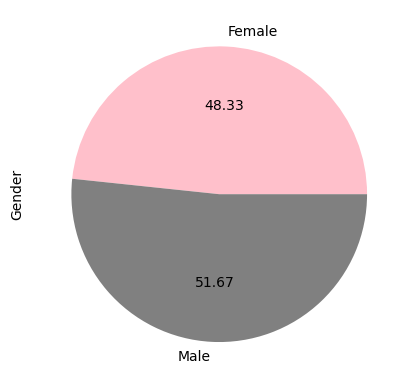

In [64]:
# male & female bought this product almost in the same portion
KP481ProductData.groupby('Gender').size().plot(kind='pie', autopct='%.2f', colors = ['Pink', 'grey'])
plt.ylabel('Gender')

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

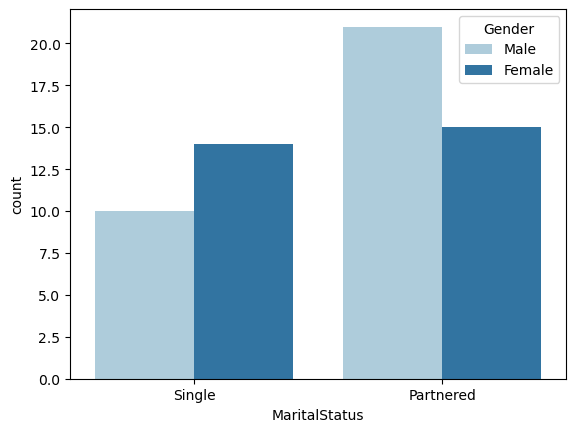

In [65]:
# Female single's & Male Partnered bought more
sns.countplot(data = KP481ProductData,
              x = 'MaritalStatus',
              hue = 'Gender',
              palette = 'Paired')

<AxesSubplot:xlabel='Income'>

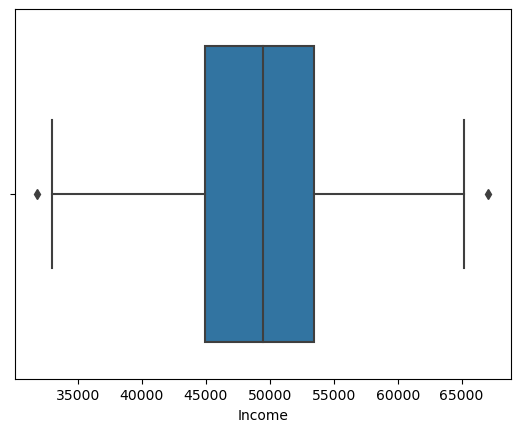

In [66]:
# There are few outliers in the income data who bought this product
sns.boxplot(data = KP481ProductData,
            x = 'Income')

<AxesSubplot:xlabel='count', ylabel='Age Category'>

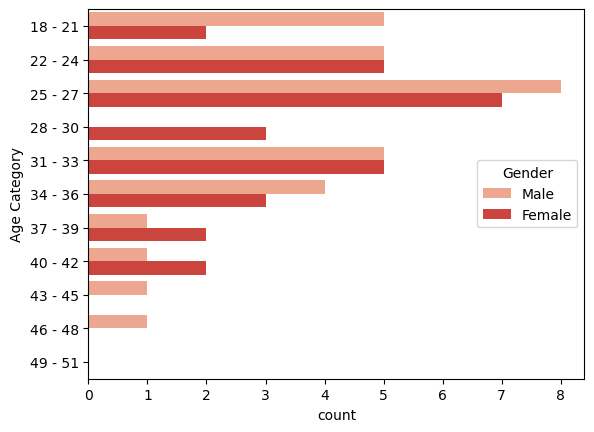

In [67]:
# 22 - 27 ranged age people bought the products more, poison distribution
sns.countplot(y = KP481ProductData['Age Category'], hue = KP481ProductData['Gender'], palette = 'Reds')

<AxesSubplot:xlabel='Education', ylabel='count'>

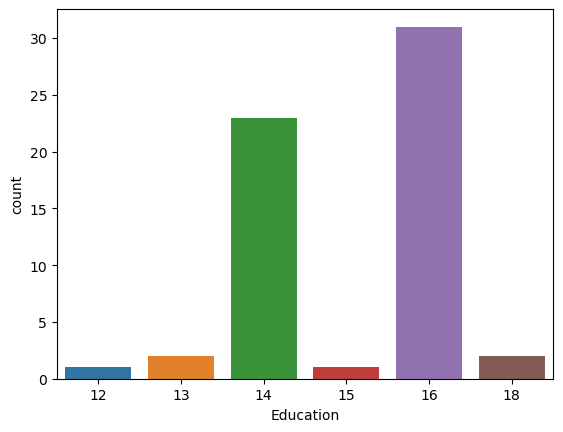

In [68]:
# customers with education 14,16 bought more products
sns.countplot(x = KP481ProductData['Education'])

<AxesSubplot:xlabel='count', ylabel='Income Category'>

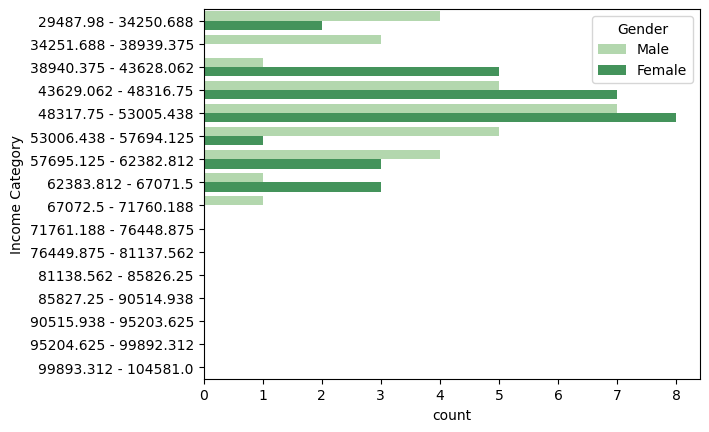

In [69]:
# 34251 - 57694 ranged income people bought the products more
sns.countplot(y = KP481ProductData['Income Category'], hue = KP481ProductData['Gender'], palette = 'Greens')

<AxesSubplot:xlabel='Fitness', ylabel='count'>

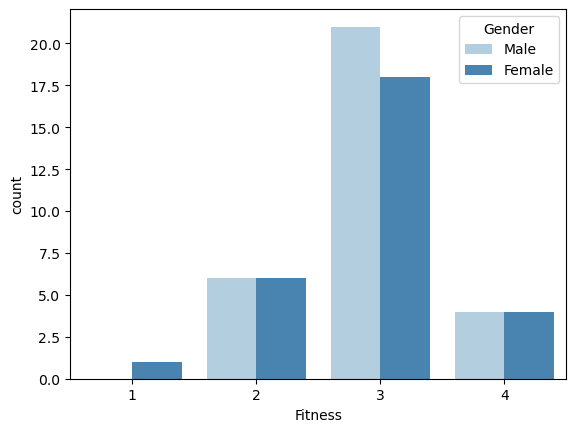

In [70]:
# people with fitness level 3 bought the product more
sns.countplot(x = KP481ProductData['Fitness'], hue = KP481ProductData['Gender'], palette = 'Blues')

<AxesSubplot:xlabel='Product', ylabel='Miles'>

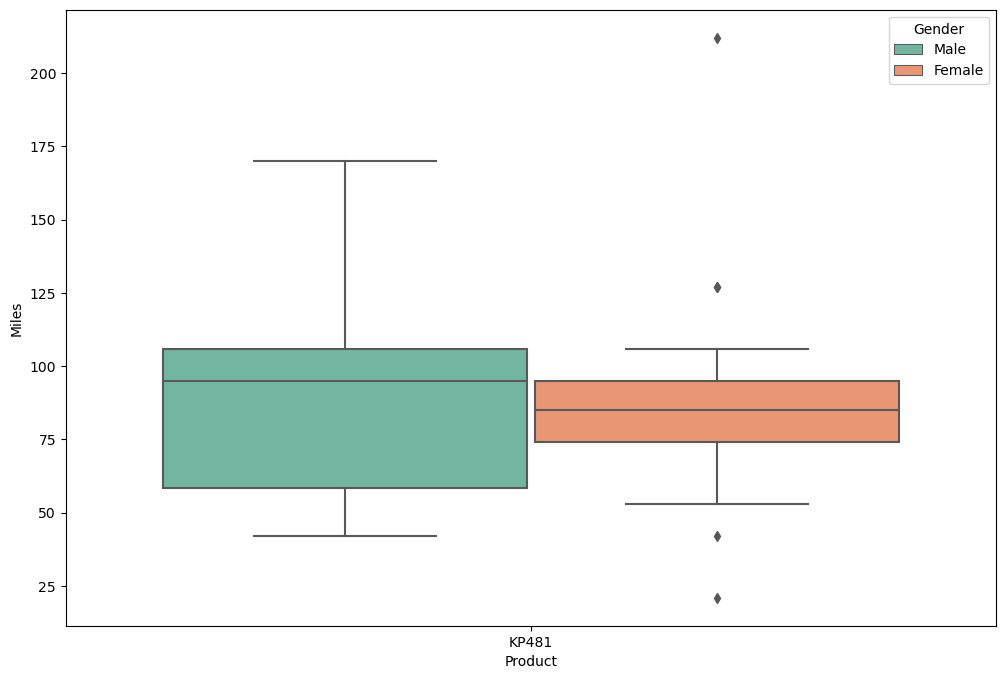

In [71]:
# range for the product based on Miles
plt.figure(figsize=(12,8))
sns.boxplot(data=KP481ProductData,
           y="Miles",
           x="Product",
           hue = 'Gender',
           palette = 'Set2')

<AxesSubplot:xlabel='Fitness', ylabel='Income'>

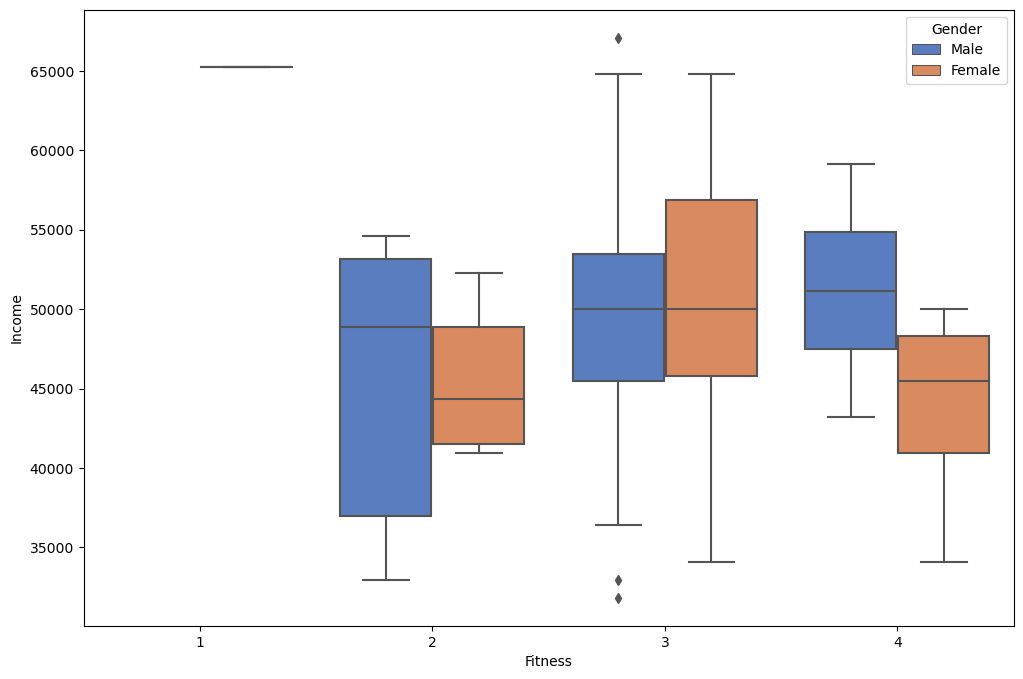

In [72]:
# range for the product based on Income, gender wise
plt.figure(figsize=(12,8))
sns.boxplot(data=KP481ProductData,
           y="Income",
           x="Fitness",
           hue = 'Gender',
           palette = 'muted')

<AxesSubplot:>

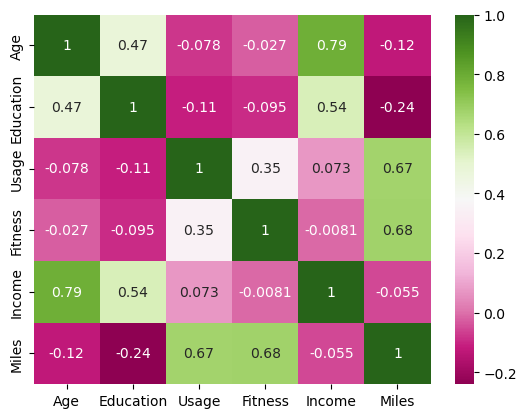

In [73]:
# fitness, miles, usage, income are more positively related
sns.heatmap(KP481ProductData.corr(), cmap = 'PiYG', annot=True)

#### Probability & Stats

In [74]:
# Gender wise probability
KP481GenderProbability = pd.crosstab(index = KP481ProductData['Product'], columns = KP481ProductData['Gender'], normalize= True)
KP481GenderProbability

Gender,Female,Male
Product,,
KP481,0.483333,0.516667


In [75]:
# age group wise probability
KP481AgeProbability = pd.crosstab(index = KP481ProductData['Gender'], columns = KP481ProductData['Age Category'], normalize= True)
KP481AgeProbability

Age Category,18 - 21,22 - 24,25 - 27,28 - 30,31 - 33,34 - 36,37 - 39,40 - 42,43 - 45,46 - 48
Gender,,,,,,,,,,
Female,0.033333,0.083333,0.116667,0.05,0.083333,0.050000,0.033333,0.033333,0.000000,0.000000
Male,0.083333,0.083333,0.133333,0.00,0.083333,0.066667,0.016667,0.016667,0.016667,0.016667


In [76]:
# income range wise probability
KP481IncomeProbability = pd.crosstab(index = KP481ProductData['Gender'], columns = KP481ProductData['Income Category'], normalize= True)
KP481IncomeProbability

Income Category,29487.98 - 34250.688,34251.688 - 38939.375,38940.375 - 43628.062,43629.062 - 48316.75,48317.75 - 53005.438,53006.438 - 57694.125,57695.125 - 62382.812,62383.812 - 67071.5,67072.5 - 71760.188
Gender,,,,,,,,,
Female,0.033333,0.00,0.083333,0.116667,0.133333,0.016667,0.050000,0.050000,0.000000
Male,0.066667,0.05,0.016667,0.083333,0.116667,0.083333,0.066667,0.016667,0.016667


In [77]:
# usage wise probability
KP481UsageProbability = pd.crosstab(index = KP481ProductData['Gender'], columns = KP481ProductData['Usage'], normalize= True)
KP481UsageProbability

Usage,2,3,4,5
Gender,,,,
Female,0.116667,0.233333,0.083333,0.05
Male,0.116667,0.283333,0.116667,0.00


In [78]:
# fitness wise probability 
KP481FitnessProbability = pd.crosstab(index = KP481ProductData['Gender'], columns = KP481ProductData['Fitness'], normalize= True)
KP481FitnessProbability

Fitness,1,2,3,4
Gender,,,,
Female,0.016667,0.1,0.30,0.066667
Male,0.000000,0.1,0.35,0.066667


In [79]:
# income ranging 43000 to 53000 has probability of 0.51
KP481IncomeProb = (KP481ProductData[(KP481ProductData['Income']>= 43000) & (KP481ProductData['Income']<= 53000)].shape[0])/KP481ProductData.shape[0]
KP481IncomeProb

0.5166666666666667

In [80]:
# age ranging 20 to 33 has probability of 0.733
KP481AgeProb = (KP481ProductData[(KP481ProductData['Age']>= 20) & (KP481ProductData['Age']<= 33)].shape[0])/KP481ProductData.shape[0]
KP481AgeProb

0.7333333333333333

In [81]:
# fitness ranging 2 to 4 has probability of 0.98
KP481FitnessProb = (KP481ProductData[(KP481ProductData['Fitness']>= 2) & (KP481ProductData['Fitness']<= 4)].shape[0])/KP481ProductData.shape[0]
KP481FitnessProb

0.9833333333333333

In [82]:
IncomeAgeProb = (KP481ProductData[(KP481ProductData['Income']>= 34000) & (KP481ProductData['Income']<= 57000) & (KP481ProductData['Age']>= 20) & (KP481ProductData['Age']<= 33)].shape[0])/KP481ProductData.shape[0]
IncomeAgeProb

0.65

In [83]:
IncomeAgeFitnessProb = (KP481ProductData[(KP481ProductData['Income']>= 34000) & (KP481ProductData['Income']<= 57000) & (KP481ProductData['Age']>= 20) & (KP481ProductData['Age']<= 33) & (KP481ProductData['Fitness']>= 2) & (KP481ProductData['Fitness']<= 4)].shape[0])/KP481ProductData.shape[0]
IncomeAgeFitnessProb

0.65

In [84]:
IncomeAgeFitnessMilesProb = (KP481ProductData[(KP481ProductData['Income']>= 34000) & (KP481ProductData['Income']<= 57000) & (KP481ProductData['Age']>= 20) & (KP481ProductData['Age']<= 33) & (KP481ProductData['Fitness']>= 2) & (KP481ProductData['Fitness']<= 4) & (KP481ProductData['Miles']>= 60) & (KP481ProductData['Miles']<= 98)].shape[0])/KP481ProductData.shape[0]
IncomeAgeFitnessMilesProb

0.31666666666666665

In [85]:
# The Median of males who bought the product, mean and limits of data based on attributes
mdata = KP481ProductData[KP481ProductData['Gender'] == 'Male']
fitness_focus = [1,2,3,4,5]
for i in fitness_focus:
    print('<---------- For fitness level', i ,'---------->')
    data = mdata[mdata['Fitness'] == i]
    if (data.shape[0] != 0):
        q1 = data[['Income', 'Miles', 'Usage', 'Education', 'Age']].quantile(0.25)
        q2 = data[['Income', 'Miles', 'Usage', 'Education', 'Age']].quantile(0.50)
        q3 = data[['Income', 'Miles', 'Usage', 'Education', 'Age']].quantile(0.75)
        print('Median Income:',q2[0],', Median Miles:',q2[1],', Medain Usage:', q2[2],', Medain Education:', q2[3],', Medain Age:', q2[4])

        iqr = q3 - q1

        lowerLimit = q1 - (1.5)*iqr
        upperLimit = q3 + (1.5)*iqr
        print('lowerLimit Income:', lowerLimit[0],', upperLimit Income:',upperLimit[0])
        print('lowerLimit Miles:', lowerLimit[1],', upperLimit Miles:',upperLimit[1])
        print('lowerLimit Usage:', lowerLimit[2],', upperLimit Usage:',upperLimit[2])
        print('lowerLimit Education:', lowerLimit[3],', upperLimit Education:',upperLimit[3])
        print('lowerLimit Age:', lowerLimit[4],', upperLimit Age:',upperLimit[4])
        mean_income = mdata[(mdata['Income'] >= lowerLimit[0]) & (mdata['Income'] <= upperLimit[0])]['Income'].mean()
        print('Mean income: ', mean_income)
        mean_miles = mdata[(mdata['Miles'] >= lowerLimit[1]) & (mdata['Miles'] <= upperLimit[1])]['Miles'].mean()
        print('Mean miles: ', mean_miles)
        mean_usage = mdata[(mdata['Usage'] >= lowerLimit[2]) & (mdata['Usage'] <= upperLimit[2])]['Usage'].mean()
        print('Mean usage: ', mean_usage)
        mean_education = mdata[(mdata['Education'] >= lowerLimit[3]) & (mdata['Education'] <= upperLimit[3])]['Education'].mean()
        print('Mean Education: ', mean_education)
        mean_age = mdata[(mdata['Age'] >= lowerLimit[4]) & (mdata['Age'] <= upperLimit[4])]['Age'].mean()
        print('Mean Age: ', mean_age)
        print()
    else:
        print('No data with this fitness level.')
        print()

<---------- For fitness level 1 ---------->
No data with this fitness level.

<---------- For fitness level 2 ---------->
Median Income: 48891.0 , Median Miles: 47.5 , Medain Usage: 2.0 , Medain Education: 16.0 , Medain Age: 26.0
lowerLimit Income: 12649.125 , upperLimit Income: 77458.125
lowerLimit Miles: 25.5 , upperLimit Miles: 69.5
lowerLimit Usage: 0.875 , upperLimit Usage: 3.875
lowerLimit Education: 12.25 , upperLimit Education: 18.25
lowerLimit Age: 5.5 , upperLimit Age: 49.5
Mean income:  48634.25806451613
Mean miles:  53.0
Mean usage:  2.7083333333333335
Mean Education:  15.133333333333333
Mean Age:  28.70967741935484

<---------- For fitness level 3 ---------->
Median Income: 50028.0 , Median Miles: 95.0 , Medain Usage: 3.0 , Medain Education: 16.0 , Medain Age: 25.0
lowerLimit Income: 33541.5 , upperLimit Income: 65377.5
lowerLimit Miles: 53.5 , upperLimit Miles: 137.5
lowerLimit Usage: 3.0 , upperLimit Usage: 3.0
lowerLimit Education: 11.0 , upperLimit Education: 19.0
lowe

In [86]:
# The Median of females who bought the product, mean and limits of data based on attributes
fdata = KP481ProductData[KP481ProductData['Gender'] == 'Female']
fitness_focus = [1,2,3,4,5]
for i in fitness_focus:
    print('<---------- For fitness level', i ,'---------->')
    data = fdata[fdata['Fitness'] == i]
    if (data.shape[0] != 0):
        
        q1 = data[['Income', 'Miles', 'Usage', 'Education', 'Age']].quantile(0.25)
        q2 = data[['Income', 'Miles', 'Usage', 'Education', 'Age']].quantile(0.50)
        q3 = data[['Income', 'Miles', 'Usage', 'Education', 'Age']].quantile(0.75)
        print('Median Income:',q2[0],', Median Miles:',q2[1],', Medain Usage:', q2[2],', Medain Education:', q2[3],', Medain Age:', q2[4])
        iqr = q3 - q1

        lowerLimit = q1 - (1.5)*iqr
        upperLimit = q3 + (1.5)*iqr
        print('lowerLimit Income:', lowerLimit[0],', upperLimit Income:',upperLimit[0])
        print('lowerLimit Miles:', lowerLimit[1],', upperLimit Miles:',upperLimit[1])
        print('lowerLimit Usage:', lowerLimit[2],', upperLimit Usage:',upperLimit[2])
        print('lowerLimit Education:', lowerLimit[3],', upperLimit Education:',upperLimit[3])
        print('lowerLimit Age:', lowerLimit[4],', upperLimit Age:',upperLimit[4])
        
        mean_income = fdata[(fdata['Income'] >= lowerLimit[0]) & (fdata['Income'] <= upperLimit[0])]['Income'].mean()
        print('Mean income: ', mean_income)
        
        mean_miles = fdata[(fdata['Miles'] >= lowerLimit[1]) & (fdata['Miles'] <= upperLimit[1])]['Miles'].mean()
        print('Mean miles: ', mean_miles)
        
        mean_usage = fdata[(fdata['Usage'] >= lowerLimit[2]) & (fdata['Usage'] <= upperLimit[2])]['Usage'].mean()
        print('Mean usage: ', mean_usage)
        
        mean_education = fdata[(fdata['Education'] >= lowerLimit[3]) & (fdata['Education'] <= upperLimit[3])]['Education'].mean()
        print('Mean Education: ', mean_education)
        
        mean_age = fdata[(fdata['Age'] >= lowerLimit[4]) & (fdata['Age'] <= upperLimit[4])]['Age'].mean()
        print('Mean Age: ', mean_age)
        print()
    else:
        print('No data with this fitness level.')
        print()

<---------- For fitness level 1 ---------->
Median Income: 65220.0 , Median Miles: 21.0 , Medain Usage: 2.0 , Medain Education: 18.0 , Medain Age: 31.0
lowerLimit Income: 65220.0 , upperLimit Income: 65220.0
lowerLimit Miles: 21.0 , upperLimit Miles: 21.0
lowerLimit Usage: 2.0 , upperLimit Usage: 2.0
lowerLimit Education: 18.0 , upperLimit Education: 18.0
lowerLimit Age: 31.0 , upperLimit Age: 31.0
Mean income:  65220.0
Mean miles:  21.0
Mean usage:  2.0
Mean Education:  18.0
Mean Age:  31.0

<---------- For fitness level 2 ---------->
Median Income: 44343.0 , Median Miles: 58.5 , Medain Usage: 3.0 , Medain Education: 14.0 , Medain Age: 24.5
lowerLimit Income: 30414.75 , upperLimit Income: 59976.75
lowerLimit Miles: 25.25 , upperLimit Miles: 99.25
lowerLimit Usage: 3.0 , upperLimit Usage: 3.0
lowerLimit Education: 11.75 , upperLimit Education: 17.75
lowerLimit Age: 9.375 , upperLimit Age: 46.375
Mean income:  47071.8
Mean miles:  77.23809523809524
Mean usage:  3.0
Mean Education:  15.0

## Analysis for KP481 Product

#### Visualisation

In [87]:
#Masking out data for product KP781
KP781ProductData = aerofit_treadmill[aerofit_treadmill['Product'] == 'KP781']
KP781ProductData.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income Category,Age Category
140,KP781,22,Male,14,Single,4,3,48658,106,48317.75 - 53005.438,22 - 24
141,KP781,22,Male,16,Single,3,5,54781,120,53006.438 - 57694.125,22 - 24
142,KP781,22,Male,18,Single,4,5,48556,200,48317.75 - 53005.438,22 - 24
143,KP781,23,Male,16,Single,4,5,58516,140,57695.125 - 62382.812,22 - 24
144,KP781,23,Female,18,Single,5,4,53536,100,53006.438 - 57694.125,22 - 24


Text(0, 0.5, 'Gender')

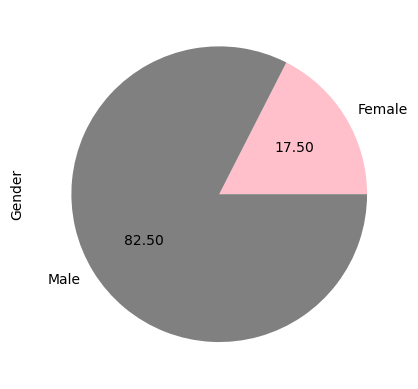

In [88]:
# male bought this product more than females
KP781ProductData.groupby('Gender').size().plot(kind='pie', autopct='%.2f', colors = ['Pink', 'grey'])
plt.ylabel('Gender')

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

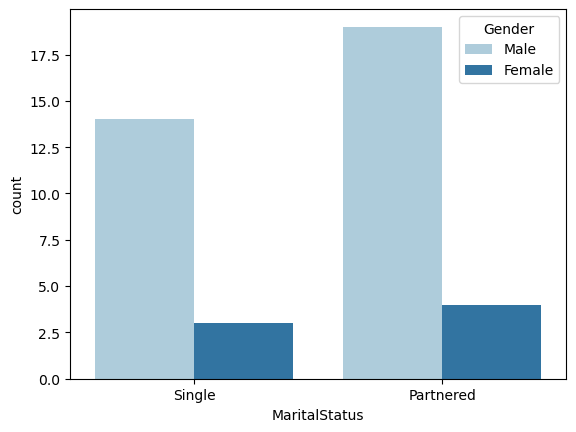

In [89]:
# Males bought more
sns.countplot(data = KP781ProductData,
              x = 'MaritalStatus',
              hue = 'Gender',
              palette = 'Paired')

<AxesSubplot:xlabel='Income'>

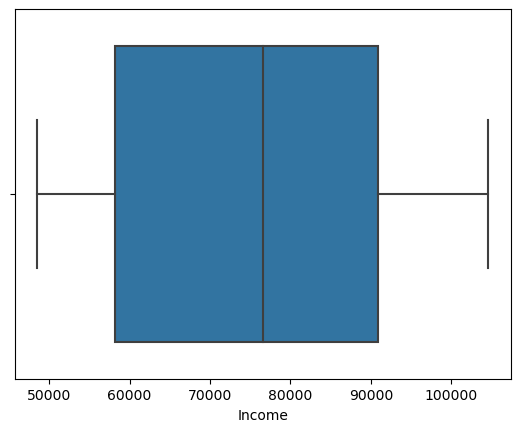

In [90]:
# There are no outliers in the income data who bought this product
sns.boxplot(data = KP781ProductData,
            x = 'Income')

<AxesSubplot:xlabel='count', ylabel='Age Category'>

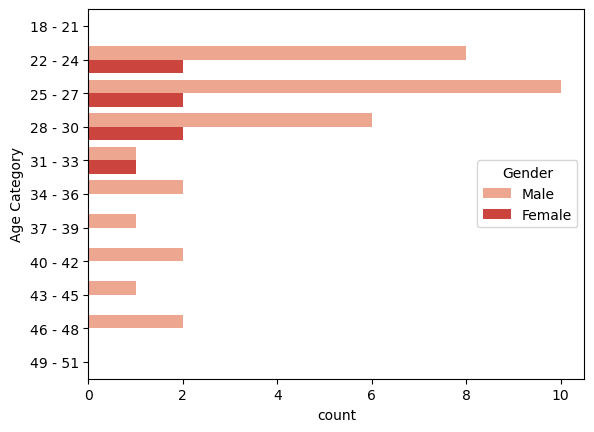

In [91]:
# 22 - 30 ranged age people bought the products more
sns.countplot(y = KP781ProductData['Age Category'], hue = KP781ProductData['Gender'], palette = 'Reds')

<AxesSubplot:xlabel='Education', ylabel='count'>

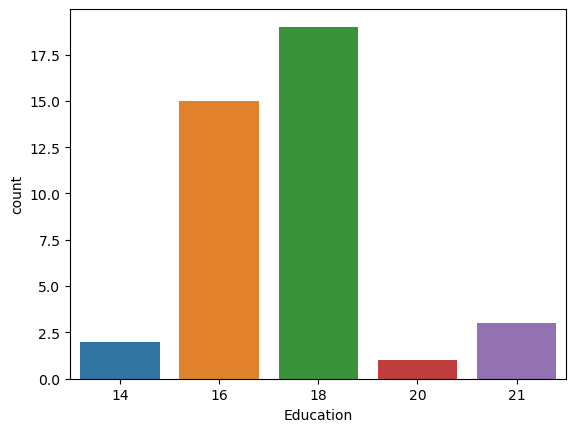

In [92]:
# customers with education 16,18 bought more products
sns.countplot(x = KP781ProductData['Education'])

<AxesSubplot:xlabel='count', ylabel='Income Category'>

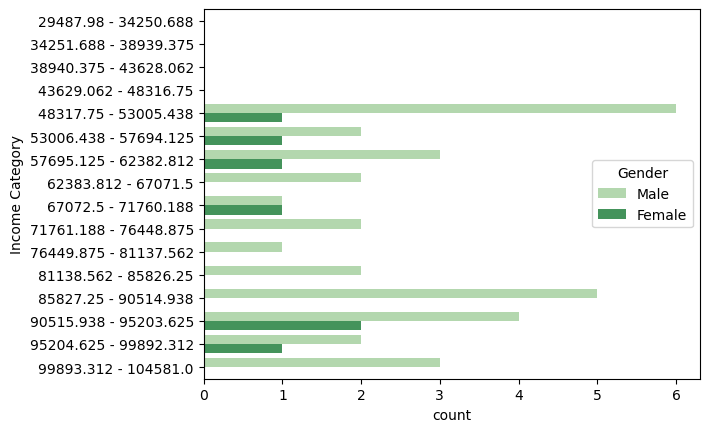

In [93]:
# 48000 - 95000 ranged income people bought the products more
sns.countplot(y = KP781ProductData['Income Category'], hue = KP781ProductData['Gender'], palette = 'Greens')

<AxesSubplot:xlabel='Fitness', ylabel='count'>

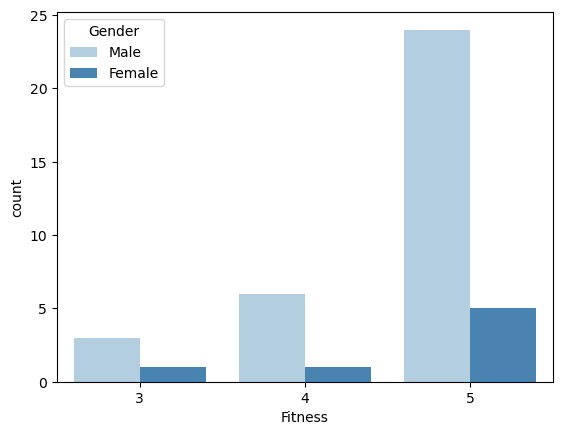

In [94]:
# people with fitness level 5 bought the product more
sns.countplot(x = KP781ProductData['Fitness'], hue = KP781ProductData['Gender'], palette = 'Blues')

<AxesSubplot:xlabel='Product', ylabel='Miles'>

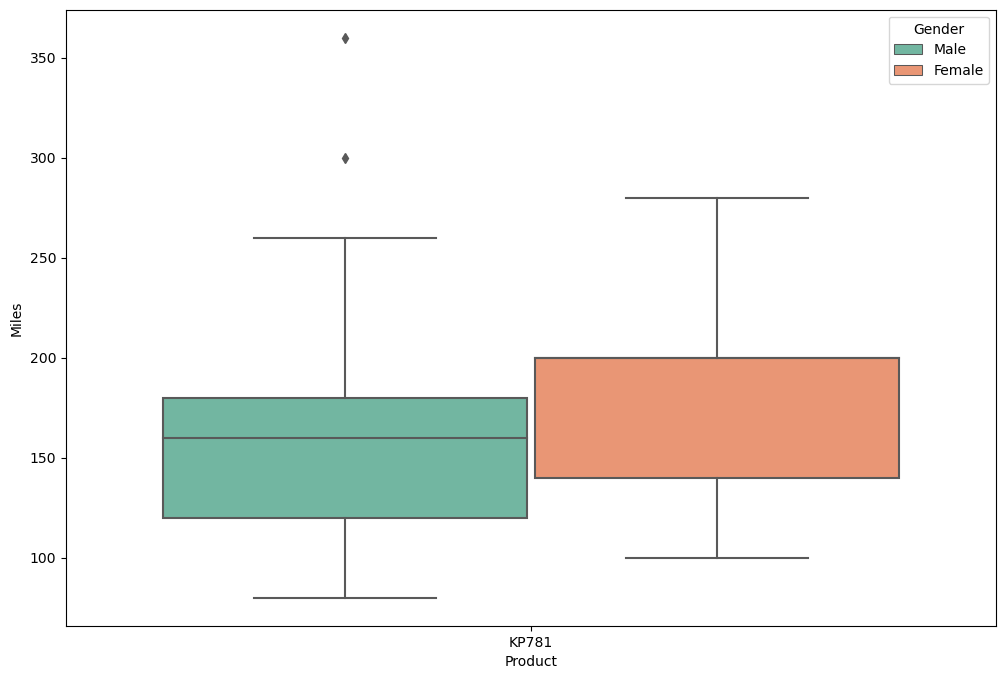

In [95]:
# range for the product based on Miles
plt.figure(figsize=(12,8))
sns.boxplot(data=KP781ProductData,
           y="Miles",
           x="Product",
           hue = 'Gender',
           palette = 'Set2')

<AxesSubplot:xlabel='Fitness', ylabel='Income'>

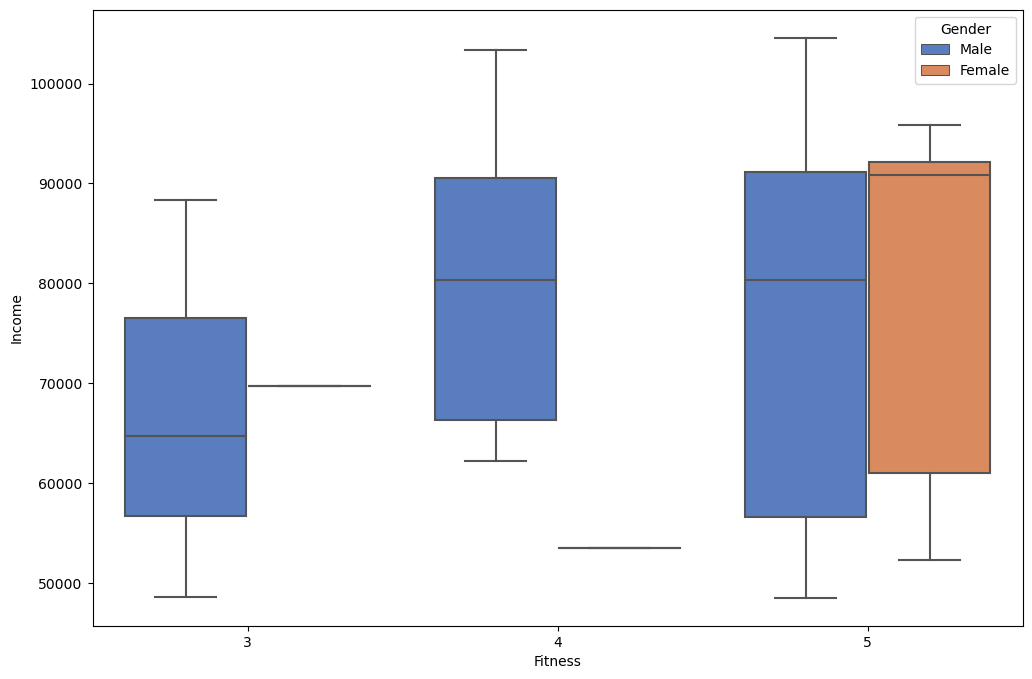

In [96]:
# range for the product based on Income, gender wise
plt.figure(figsize=(12,8))
sns.boxplot(data=KP781ProductData,
           y="Income",
           x="Fitness",
           hue = 'Gender',
           palette = 'muted')

<AxesSubplot:>

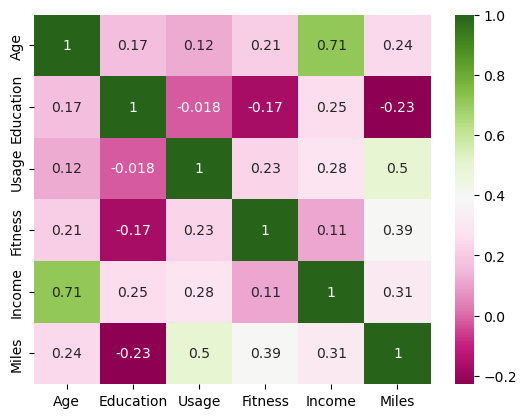

In [97]:
# fitness, miles, usage, income are more positively related
sns.heatmap(KP781ProductData.corr(), cmap = 'PiYG', annot=True)

#### Probability & Stats

In [98]:
# Gender wise probability
KP781GenderProbability = pd.crosstab(index = KP781ProductData['Product'], columns = KP781ProductData['Gender'], normalize= True)
KP781GenderProbability

Gender,Female,Male
Product,,
KP781,0.175,0.825


In [99]:
# age group wise probability
KP781AgeProbability = pd.crosstab(index = KP781ProductData['Gender'], columns = KP781ProductData['Age Category'], normalize= True)
KP781AgeProbability

Age Category,22 - 24,25 - 27,28 - 30,31 - 33,34 - 36,37 - 39,40 - 42,43 - 45,46 - 48
Gender,,,,,,,,,
Female,0.05,0.05,0.05,0.025,0.00,0.000,0.00,0.000,0.00
Male,0.20,0.25,0.15,0.025,0.05,0.025,0.05,0.025,0.05


In [100]:
# income range wise probability
KP781IncomeProbability = pd.crosstab(index = KP781ProductData['Gender'], columns = KP781ProductData['Income Category'], normalize= True)
KP781IncomeProbability

Income Category,48317.75 - 53005.438,53006.438 - 57694.125,57695.125 - 62382.812,62383.812 - 67071.5,67072.5 - 71760.188,71761.188 - 76448.875,76449.875 - 81137.562,81138.562 - 85826.25,85827.25 - 90514.938,90515.938 - 95203.625,95204.625 - 99892.312,99893.312 - 104581.0
Gender,,,,,,,,,,,,
Female,0.025,0.025,0.025,0.00,0.025,0.00,0.000,0.00,0.000,0.05,0.025,0.000
Male,0.150,0.050,0.075,0.05,0.025,0.05,0.025,0.05,0.125,0.10,0.050,0.075


In [101]:
# usage wise probability
KP781MilesProbability = pd.crosstab(index = KP781ProductData['Gender'], columns = KP781ProductData['Usage'], normalize= True)
KP781MilesProbability

Usage,3,4,5,6,7
Gender,,,,,
Female,0.000,0.05,0.075,0.050,0.00
Male,0.025,0.40,0.225,0.125,0.05


In [102]:
# fitness wise probability 
KP781FitnessProbability = pd.crosstab(index = KP781ProductData['Gender'], columns = KP781ProductData['Fitness'], normalize= True)
KP781FitnessProbability

Fitness,3,4,5
Gender,,,
Female,0.025,0.025,0.125
Male,0.075,0.150,0.600


In [103]:
# income ranging 48000 to 91000 has probability of 0.775
KP781IncomeProb = (KP781ProductData[(KP781ProductData['Income']>= 48000) & (KP781ProductData['Income']<= 91000)].shape[0])/KP781ProductData.shape[0]
KP781IncomeProb

0.775

In [104]:
# age ranging 20 to 33 has probability of 0.8
KP781AgeProb = (KP781ProductData[(KP781ProductData['Age']>= 20) & (KP781ProductData['Age']<= 33)].shape[0])/KP781ProductData.shape[0]
KP781AgeProb

0.8

In [105]:
# fitness ranging 3 to 5 has probability of 1.0
KP781FitnessProb = (KP781ProductData[(KP781ProductData['Fitness']>= 3) & (KP781ProductData['Fitness']<= 5)].shape[0])/KP781ProductData.shape[0]
KP781FitnessProb

1.0

In [106]:
IncomeAgeProb = (KP781ProductData[(KP781ProductData['Income']>= 48000) & (KP781ProductData['Income']<= 91000) & (KP781ProductData['Age']>= 20) & (KP781ProductData['Age']<= 33)].shape[0])/KP781ProductData.shape[0]
IncomeAgeProb

0.7

In [107]:
IncomeAgeFitnessProb = (KP781ProductData[(KP781ProductData['Income']>= 45000) & (KP781ProductData['Income']<= 91000) & (KP781ProductData['Age']>= 20) & (KP781ProductData['Age']<= 33) & (KP781ProductData['Fitness']>= 3) & (KP781ProductData['Fitness']<= 5)].shape[0])/KP781ProductData.shape[0]
IncomeAgeFitnessProb

0.7

In [108]:
# The Median of males who bought the product, mean and limits of data based on attributes
mdata = KP781ProductData[KP781ProductData['Gender'] == 'Male']
fitness_focus = [1,2,3,4,5]
for i in fitness_focus:
    print('<---------- For fitness level', i ,'---------->')
    data = mdata[mdata['Fitness'] == i]
    if (data.shape[0] != 0):
        q1 = data[['Income', 'Miles', 'Usage', 'Education', 'Age']].quantile(0.25)
        q2 = data[['Income', 'Miles', 'Usage', 'Education', 'Age']].quantile(0.50)
        q3 = data[['Income', 'Miles', 'Usage', 'Education', 'Age']].quantile(0.75)
        print('Median Income:',q2[0],', Median Miles:',q2[1],', Medain Usage:', q2[2],', Medain Education:', q2[3],', Medain Age:', q2[4])

        iqr = q3 - q1

        lowerLimit = q1 - (1.5)*iqr
        upperLimit = q3 + (1.5)*iqr
        print('lowerLimit Income:', lowerLimit[0],', upperLimit Income:',upperLimit[0])
        print('lowerLimit Miles:', lowerLimit[1],', upperLimit Miles:',upperLimit[1])
        print('lowerLimit Usage:', lowerLimit[2],', upperLimit Usage:',upperLimit[2])
        print('lowerLimit Education:', lowerLimit[3],', upperLimit Education:',upperLimit[3])
        print('lowerLimit Age:', lowerLimit[4],', upperLimit Age:',upperLimit[4])
        mean_income = mdata[(mdata['Income'] >= lowerLimit[0]) & (mdata['Income'] <= upperLimit[0])]['Income'].mean()
        print('Mean income: ', mean_income)
        mean_miles = mdata[(mdata['Miles'] >= lowerLimit[1]) & (mdata['Miles'] <= upperLimit[1])]['Miles'].mean()
        print('Mean miles: ', mean_miles)
        mean_usage = mdata[(mdata['Usage'] >= lowerLimit[2]) & (mdata['Usage'] <= upperLimit[2])]['Usage'].mean()
        print('Mean usage: ', mean_usage)
        mean_education = mdata[(mdata['Education'] >= lowerLimit[3]) & (mdata['Education'] <= upperLimit[3])]['Education'].mean()
        print('Mean Education: ', mean_education)
        mean_age = mdata[(mdata['Age'] >= lowerLimit[4]) & (mdata['Age'] <= upperLimit[4])]['Age'].mean()
        print('Mean Age: ', mean_age)
        print()
    else:
        print('No data with this fitness level.')
        print()

<---------- For fitness level 1 ---------->
No data with this fitness level.

<---------- For fitness level 2 ---------->
No data with this fitness level.

<---------- For fitness level 3 ---------->
Median Income: 64741.0 , Median Miles: 100.0 , Medain Usage: 4.0 , Medain Education: 18.0 , Medain Age: 25.0
lowerLimit Income: 26896.0 , upperLimit Income: 106372.0
lowerLimit Miles: 95.5 , upperLimit Miles: 107.5
lowerLimit Usage: 4.0 , upperLimit Usage: 4.0
lowerLimit Education: 13.0 , upperLimit Education: 21.0
lowerLimit Age: 19.75 , upperLimit Age: 29.75
Mean income:  75825.0303030303
Mean miles:  101.0
Mean usage:  4.0
Mean Education:  17.21212121212121
Mean Age:  25.227272727272727

<---------- For fitness level 4 ---------->
Median Income: 80303.5 , Median Miles: 170.0 , Medain Usage: 5.0 , Medain Education: 18.0 , Medain Age: 26.5
lowerLimit Income: 29881.0 , upperLimit Income: 126991.0
lowerLimit Miles: 130.0 , upperLimit Miles: 210.0
lowerLimit Usage: 3.125 , upperLimit Usage: 

In [109]:
# The Median of females who bought the product, mean and limits of data based on attributes
fdata = KP781ProductData[KP781ProductData['Gender'] == 'Female']
fitness_focus = [1,2,3,4,5]
for i in fitness_focus:
    print('<---------- For fitness level', i ,'---------->')
    data = fdata[fdata['Fitness'] == i]
    if (data.shape[0] != 0):
        
        q1 = data[['Income', 'Miles', 'Usage', 'Education', 'Age']].quantile(0.25)
        q2 = data[['Income', 'Miles', 'Usage', 'Education', 'Age']].quantile(0.50)
        q3 = data[['Income', 'Miles', 'Usage', 'Education', 'Age']].quantile(0.75)
        print('Median Income:',q2[0],', Median Miles:',q2[1],', Medain Usage:', q2[2],', Medain Education:', q2[3],', Medain Age:', q2[4])
        iqr = q3 - q1

        lowerLimit = q1 - (1.5)*iqr
        upperLimit = q3 + (1.5)*iqr
        print('lowerLimit Income:', lowerLimit[0],', upperLimit Income:',upperLimit[0])
        print('lowerLimit Miles:', lowerLimit[1],', upperLimit Miles:',upperLimit[1])
        print('lowerLimit Usage:', lowerLimit[2],', upperLimit Usage:',upperLimit[2])
        print('lowerLimit Education:', lowerLimit[3],', upperLimit Education:',upperLimit[3])
        print('lowerLimit Age:', lowerLimit[4],', upperLimit Age:',upperLimit[4])
        
        mean_income = fdata[(fdata['Income'] >= lowerLimit[0]) & (fdata['Income'] <= upperLimit[0])]['Income'].mean()
        print('Mean income: ', mean_income)
        
        mean_miles = fdata[(fdata['Miles'] >= lowerLimit[1]) & (fdata['Miles'] <= upperLimit[1])]['Miles'].mean()
        print('Mean miles: ', mean_miles)
        
        mean_usage = fdata[(fdata['Usage'] >= lowerLimit[2]) & (fdata['Usage'] <= upperLimit[2])]['Usage'].mean()
        print('Mean usage: ', mean_usage)
        
        mean_education = fdata[(fdata['Education'] >= lowerLimit[3]) & (fdata['Education'] <= upperLimit[3])]['Education'].mean()
        print('Mean Education: ', mean_education)
        
        mean_age = fdata[(fdata['Age'] >= lowerLimit[4]) & (fdata['Age'] <= upperLimit[4])]['Age'].mean()
        print('Mean Age: ', mean_age)
        print()
    else:
        print('No data with this fitness level.')
        print()

<---------- For fitness level 1 ---------->
No data with this fitness level.

<---------- For fitness level 2 ---------->
No data with this fitness level.

<---------- For fitness level 3 ---------->
Median Income: 69721.0 , Median Miles: 100.0 , Medain Usage: 4.0 , Medain Education: 21.0 , Medain Age: 26.0
lowerLimit Income: 69721.0 , upperLimit Income: 69721.0
lowerLimit Miles: 100.0 , upperLimit Miles: 100.0
lowerLimit Usage: 4.0 , upperLimit Usage: 4.0
lowerLimit Education: 21.0 , upperLimit Education: 21.0
lowerLimit Age: 26.0 , upperLimit Age: 26.0
Mean income:  69721.0
Mean miles:  100.0
Mean usage:  4.0
Mean Education:  21.0
Mean Age:  26.0

<---------- For fitness level 4 ---------->
Median Income: 53536.0 , Median Miles: 100.0 , Medain Usage: 5.0 , Medain Education: 18.0 , Medain Age: 23.0
lowerLimit Income: 53536.0 , upperLimit Income: 53536.0
lowerLimit Miles: 100.0 , upperLimit Miles: 100.0
lowerLimit Usage: 5.0 , upperLimit Usage: 5.0
lowerLimit Education: 18.0 , upperLim

## Recommendations

#### Product - KP781

1. if the fitness level > 3 and income > 53000 (female) & income > 70000 (Male)
2. if usage > 4 and miles >= 100
3. education is 16 or 18
4. Age : 25 - 29 (Male), 23 - 27 (Female)

#### Product - KP481

1. income range 38000 - 62000 (male) & income range 38000 - 53000 (female)
2. usage : 2-4
3. education is 16 or 14
4. Mean Age : 28 (Male), 26 - 29 (Female)
5. Fitness range 2-4, and more chances if 3.


#### Product - KP281

1. income range 45000 - 50000 (male) & income range 44000 - 50000 (female)
2. Mean usage : 3-4 (male), 2 (female)
3. education is 16 or 14
4. Mean Age : 28 - 34 (Male), 26 - 28 (Female)
5. Fitness range 2-4, and more chances if 3.
